In [ ]:
import networkx as nx

# build a ER graph
G = nx.erdos_renyi_graph(100, 0.1)

In [ ]:
# set the node attribute
from cv2 import threshold
import numpy as np

threshold_value = 60
for node in G:
    time = 0
    N0 = np.random.randint(100,1000)
    I0 = np.random.randint(1,10)
    S0 = N0 - I0
    R0 = 0
    β = np.random.normal(1,0.1)
    γ = np.random.normal(1,0.1)
    G.nodes[node][0] = {'S':S0,'I':I0,'R':R0,'N':N0,'β':β,'γ':γ}
    for time in range(1,threshold_value):
        G.nodes[node][time] = {'S':0,'I':0,'R':0,'N':N0,'β':β,'γ':γ}
    
    

# set the edge attribute
for edge in G.edges:
    G.edges[edge]['weight'] = np.random.normal(0.1,0.01)

for node in G:
    # get node's neighbor node and the weight of the edge
    node_neight_weight = []
    for neighbor, weight in G[node].items():
        node_neight_weight.append((neighbor,weight['weight']))
    for time in range(1,threshold_value): 
        # calculate the S for each node
        G.nodes[node][time]['I'] = G.nodes[node][time-1]['I'] * G.nodes[node][time-1]['β'] * G.nodes[node][time-1]['S'] / G.nodes[node][time-1]['N'] - G.nodes[node][time-1]['γ'] * G.nodes[node][time-1]['I']
        for neight, weight in node_neight_weight:
            G.nodes[node][time]['I'] += weight*G.nodes[neight][time-1]['I'] * G.nodes[neight][time-1]['β'] * G.nodes[neight][time-1]['S'] / G.nodes[neight][time-1]['N']
        G.nodes[node][time]['S'] = max(0,G.nodes[node][time-1]['S'] - G.nodes[node][time]['I']*G.nodes[node][time-1]['β']*G.nodes[node][time-1]['S']/G.nodes[node][time-1]['N'])
        G.nodes[node][time]['R'] = G.nodes[node][time-1]['R'] + G.nodes[node][time-1]['γ'] * G.nodes[node][time-1]['I']
        G.nodes[node][time]['N'] = G.nodes[node][time-1]['N']
        G.nodes[node][time]['β'] = G.nodes[node][time-1]['β']
        G.nodes[node][time]['γ'] = G.nodes[node][time-1]['γ']

In [ ]:
for node in G:
    # print(G.nodes[node])
    print(G.nodes[node])
    

In [86]:
np.random.normal(1,0.1)

1.0351820762140584

In [73]:
# convet the G to a pandas dataframe
import pandas as pd
dataframe = pd.DataFrame({'S':[],'I':[],'R':[],'N':[],'β':[],'γ':[],'loc':[],'time':[]})
for node in G:
    for time in range(0,threshold_value):
        dataframe = pd.concat([dataframe, pd.DataFrame({'S':[G.nodes[node][time]['S']],'I':[G.nodes[node][time]['I']],'R':[G.nodes[node][time]['R']],'N':[G.nodes[node][time]['N']],'β':[G.nodes[node][time]['β']],'γ':[G.nodes[node][time]['γ']],'loc':[node],'time':[time]})], ignore_index=True)

In [75]:
dataframe

,S,I,R,N,β,γ,loc,time
0,132.000000,8.000000e+00,0.000000,140.0,0.983959,1.100832,0.0,0.0
1,130.202933,1.937052e+00,8.806656,140.0,0.983959,1.100832,0.0,1.0
2,130.532156,-3.597668e-01,10.939024,140.0,0.983959,1.100832,0.0,2.0
3,130.471619,6.598669e-02,10.542981,140.0,0.983959,1.100832,0.0,3.0
4,130.482743,-1.213104e-02,10.615621,140.0,0.983959,1.100832,0.0,4.0
...,...,...,...,...,...,...,...,...
5995,403.208681,5.183876e-25,13.793129,416.0,0.975130,1.047304,99.0,55.0
5996,403.208681,-1.811295e-25,13.793129,416.0,0.975130,1.047304,99.0,56.0
5997,403.208681,6.324357e-26,13.793129,416.0,0.975130,1.047304,99.0,57.0
5998,403.208681,-2.206745e-26,13.793129,416.0,0.975130,1.047304,99.0,58.0


<AxesSubplot:xlabel='time', ylabel='I'>

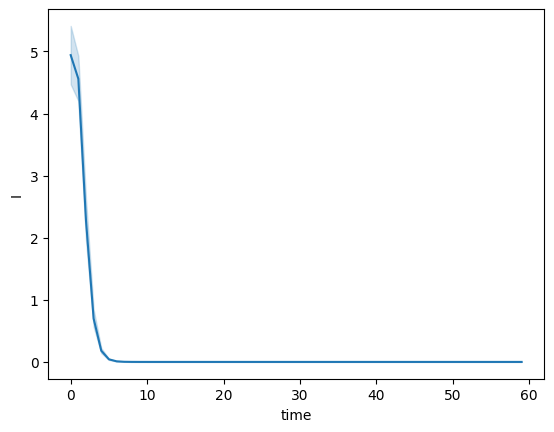

In [74]:
dataframe[dataframe['loc']==0]['I']

import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x='time',y='I',data = dataframe)

In [ ]:
for node in G:
    connected_nodes = G.neighbors(node)
    connected_nodes = [node for node in connected_nodes]
    for neightbor in connected_nodes:
        print(node,neightbor,G.edges[node,neightbor]['weight'])
    connected_edges = [G.edges[edge]['weight'] for edge in G.edges if edge[0] == node]
    connected_I = [G.nodes[connected_node][0]['I'] for connected_node in connected_nodes]
    print(node,connected_nodes,connected_edges)
    break
    

In [ ]:
# build a association matrix
A = nx.adjacency_matrix(G)


In [ ]:
A

In [ ]:
import numpy as np
amatrix = np.array(A.todense())

In [ ]:
amatrix

In [ ]:
# show the graph
nx.draw(G, with_labels=True)

In [ ]:
# for each node, we build an isolated cases
# the initial state is (N0-I0,I0,0,N0,β,γ)
# S0 is the initial number of susceptible individuals
# I0 is the initial number of infected individuals
# R0 is the initial number of recovered individuals
# N0 is the total population
# β is the infection rate
# γ is the recovery rate
#
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataframe = pd.DataFrame({'S':[],'I':[],'R':[],'N':[],'β':[],'γ':[]})
for node in G:
    N0 = np.random.randint(100,1000)
    I0 = np.random.randint(1,10)
    S0 = N0 - I0
    R0 = 0
    β = np.random.normal(2,0.1)
    γ = np.random.normal(1,0.1)
    dataframe = pd.concat([dataframe, pd.DataFrame({'S':[S0],'I':[I0],'R':[R0],'N':[N0],'β':[β],'γ':[γ],'loc':[node],'time':[0]})], ignore_index=True)
    for time in range(1,50):
        S0 = S0 - β*S0*I0/N0
        I0 = I0 + β*S0*I0/N0 - γ*I0
        R0 = R0 + γ*I0
        S0 = int(S0)
        I0 = int(I0)
        R0 = int(R0)
        dataframe = pd.concat([dataframe,pd.DataFrame({'S':[S0],'I':[I0],'R':[R0],'N':[N0],'β':[β],'γ':[γ],'loc':[node],'time':[time]})],ignore_index=True)
dataframe




In [ ]:
dataframe[dataframe['loc']==0]['I']

import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x='time',y='I',data = dataframe)

In [ ]:
# two nodes interact with each other
